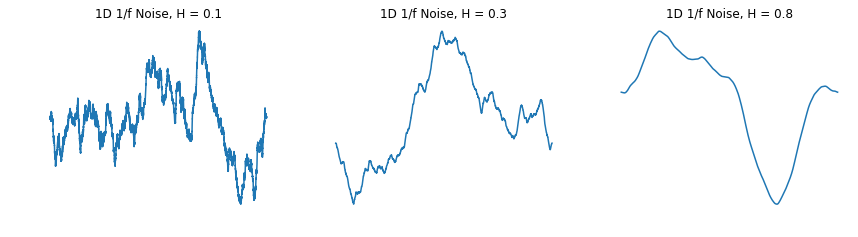

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

N = 102400    # num samples per point in 3D grid
sampling_freq = 1
num_spectral_density_samples = 1000

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14.5, 3.5)

# calculate frequencies
frequencies = []
for i in range(1, N):
    freq = sampling_freq * i / N
    frequencies.append(freq)

for ix, H in enumerate((0.1, 0.3, 0.8)):
    white_noise = np.random.normal(0, 1, size=N-1)
    in_freq = np.fft.fft(white_noise)
    """
    plt.plot(white_noise)
    plt.show()
    in_freq = np.fft.fft(white_noise)
    plt.plot(frequencies, in_freq)
    plt.show()
    """

    # Calculate spectral density in 1D case

    n = 1

    def calc_spectral_density(freq, H):
        freq = np.array(freq)
        numerator = 1
        denominator = np.sqrt(np.sum(freq ** 2)) ** (2*H+n)
        result = numerator / denominator
        return result

    f = np.array(frequencies)
    spectral_density = in_freq * np.array([calc_spectral_density(freq, H) for freq in f])

    """
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(frequencies, spectral_density)
    plt.show()
    """
    # print(spectral_density)

    # Apply IFFT
    final_velocities = np.fft.irfft(spectral_density)
    
    # Plot of spectral densities
    # count, bins, ignored = plt.hist(new_samples, 30, normed=True)
    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    #             linewidth=2, color='r')
    
    ax[ix].set_title('1D 1/f Noise, H = {}'.format(H))
    ax[ix].axis('off')
    ax[ix].plot(final_velocities)
plt.show()


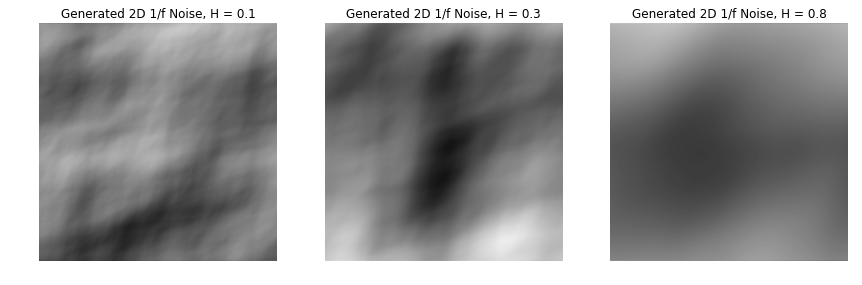

In [35]:
N = 1024
n = 2

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14.5, 6.5)

for ix, H in enumerate((0.1, 0.3, 0.8)):
    frequencies = []
    white_noise = np.random.normal(0, 1, size=(N-1) *(N-1))
    in_freq = np.fft.fft(white_noise)
    for i in range(1, N):
        freq = sampling_freq * i / N
        frequencies.append(freq)

    frequencies = np.array(list(product(frequencies, frequencies)))
    spectral_density = in_freq * np.array([calc_spectral_density(freq, H) for freq in frequencies])
    # print(spectral_density)

    # Apply IFFT
    final_velocities = np.fft.irfft(spectral_density)
    final_velocities = np.reshape(final_velocities[:(len(final_velocities)//2 + 1)], (N - 1, N - 1))

    # Plot of spectral densities
    # count, bins, ignored = plt.hist(new_samples, 30, normed=True)
    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    #             linewidth=2, color='r')
    ax[ix] = plt.subplot(1, 3, ix+1)
    plt.title('Generated 2D 1/f Noise, H = {}'.format(H))
    plt.axis('off')
    ax[ix].imshow(final_velocities, cmap='gray', interpolation="quadric")
plt.show()

(99, 99, 99)


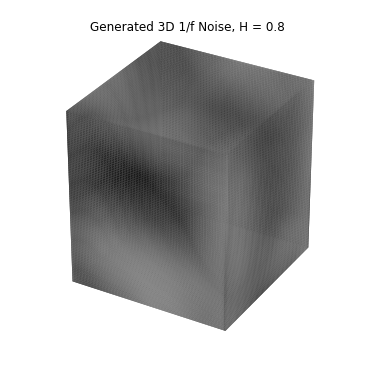

In [86]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage.filters import gaussian_filter

N = 100
n = 3

fig = plt.figure(figsize=(5, 5))

frequencies = []

for i in range(1, N):
    freq = sampling_freq * i / N
    frequencies.append(freq)
frequencies = np.array(list(product(frequencies, repeat=3)))

indices = np.arange(N - 1)
indices_3d = np.array(list(product(indices, repeat=3)))
x = [index[0] for index in indices_3d]
y = [index[1] for index in indices_3d]
z = [index[2] for index in indices_3d]

voxel_fill = np.ones(((N-1,N-1,N-1)))
print(voxel_fill.shape)
for ix, H in enumerate((0.8,)):
    white_noise = np.random.normal(0, 1, size=(N-1)**3)
    in_freq = np.fft.fft(white_noise)

    spectral_density = in_freq * np.array([calc_spectral_density(freq, H) for freq in frequencies])
    # print(spectral_density)

    # Apply IFFT
    final_velocities = np.fft.irfft(spectral_density)
    final_velocities = final_velocities[:(len(final_velocities)//2 + 1)]
    
    ax = Axes3D(fig)
    ax.set_title('Generated 3D 1/f Noise, H = {}'.format(H))
    normalized_velocities = np.reshape((np.abs(final_velocities)/ np.max(np.abs(final_velocities))), (N-1,N-1,N-1))
    normalized_velocities = gaussian_filter(normalized_velocities, 1)
    colors = np.zeros(normalized_velocities.shape + (3,))
    colors[..., 0] = normalized_velocities
    colors[..., 1] = normalized_velocities
    colors[..., 2] = normalized_velocities
    ax.axis('off')
    ax.voxels(voxel_fill, facecolors=colors, cmap="gray")
plt.show()
